In [2]:
# Classification models
## Logistic regression 

In [3]:
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [4]:
df = pd.read_csv("AIGLOBALINDEX.csv")
df

,Country,Talent,Infrastructure,Operating Environment,Research,Development,Government Strategy,Commercial,Total score,Region,Cluster,Income group,Political regime
0,United States of America,100.00,94.02,64.56,100.00,100.00,77.39,100.00,100.00,Americas,Power players,High,Liberal democracy
1,China,16.51,100.00,91.57,71.42,79.97,94.87,44.02,62.92,Asia-Pacific,Power players,Upper middle,Closed autocracy
2,United Kingdom,39.65,71.43,74.65,36.50,25.03,82.82,18.91,40.93,Europe,Traditional champions,High,Liberal democracy
3,Canada,31.28,77.05,93.94,30.67,25.78,100.00,14.88,40.19,Americas,Traditional champions,High,Liberal democracy
4,Israel,35.76,67.58,82.44,32.63,27.96,43.91,27.33,39.89,Middle East,Rising stars,High,Liberal democracy
...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,Sri Lanka,6.27,34.64,35.79,0.12,0.95,35.57,0.09,6.62,Asia-Pacific,Nascent,Lower middle,Electoral democracy
58,Egypt,1.11,38.84,0.00,2.08,1.54,68.72,0.31,4.83,Middle East,Nascent,Lower middle,Electoral autocracy
59,Kenya,0.75,14.11,29.84,0.07,12.15,7.75,0.31,2.30,Africa,Nascent,Lower middle,Electoral autocracy
60,Nigeria,2.74,0.00,50.10,0.45,2.06,7.75,0.33,1.38,Africa,Nascent,Lower middle,Electoral autocracy


In [5]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country                62 non-null     object 
 1   Talent                 62 non-null     float64
 2   Infrastructure         62 non-null     float64
 3   Operating Environment  62 non-null     float64
 4   Research               62 non-null     float64
 5   Development            62 non-null     float64
 6   Government Strategy    62 non-null     float64
 7   Commercial             62 non-null     float64
 8   Total score            62 non-null     float64
 9   Region                 62 non-null     object 
 10  Cluster                62 non-null     object 
 11  Income group           62 non-null     object 
 12  Political regime       62 non-null     object 
dtypes: float64(8), object(5)
memory usage: 6.4+ KB
None


In [6]:
print(df.shape)

(62, 13)


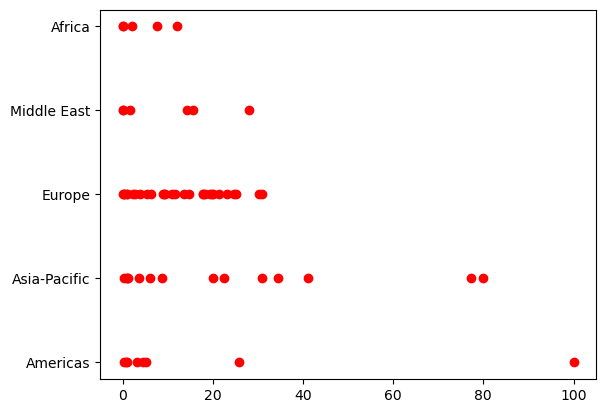

In [7]:
plt.scatter(df.Development,df.Region,color='red')

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['Development']],df.Region,train_size=0.8)

X_test

,Development
24,13.56
6,77.25
8,24.79
40,0.34
26,19.81
13,8.92
30,14.66
49,0.26
1,79.97
15,34.47


In [9]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [10]:
model.fit(X_train, y_train)

LogisticRegression()

In [11]:
model.fit(X_train, y_train)

LogisticRegression()

In [12]:
y_predicted = model.predict(X_test)

model.predict_proba(X_test)

array([[5.96680007e-02, 1.45774784e-01, 2.38141473e-01, 4.55197388e-01,
        1.01218354e-01],
       [1.14308230e-04, 4.06913267e-01, 1.88102347e-01, 3.85092462e-01,
        1.97776167e-02],
       [2.10405470e-02, 1.85691594e-01, 2.42814201e-01, 4.69779758e-01,
        8.06739002e-02],
       [1.82259789e-01, 9.81734715e-02, 2.08424139e-01, 3.92758828e-01,
        1.18383773e-01],
       [3.36262902e-02, 1.67902625e-01, 2.42330721e-01, 4.66335113e-01,
        8.98052507e-02],
       [8.99522491e-02, 1.29265927e-01, 2.31514947e-01, 4.40323943e-01,
        1.08942934e-01],
       [5.40201242e-02, 1.49669572e-01, 2.39230781e-01, 4.57821906e-01,
        9.92576162e-02],
       [1.83386440e-01, 9.78806630e-02, 2.08132275e-01, 3.92175024e-01,
        1.18425599e-01],
       [8.64423200e-05, 4.20003791e-01, 1.83963261e-01, 3.77724215e-01,
        1.82222902e-02],
       [8.29123276e-03, 2.21391069e-01, 2.38953805e-01, 4.67158525e-01,
        6.42053680e-02],
       [2.46696470e-02, 1.7966

In [13]:
model.score(X_test,y_test)

0.6153846153846154

In [14]:
y_predicted

array(['Europe', 'Americas', 'Europe', 'Europe', 'Europe', 'Europe',
       'Europe', 'Europe', 'Americas', 'Europe', 'Europe', 'Europe',
       'Europe'], dtype=object)

In [15]:
model.coef_

array([[-0.07543191],
       [ 0.03893753],
       [ 0.01911627],
       [ 0.02019385],
       [-0.00281575]])

In [16]:
model.intercept_

array([ 0.0553056 , -0.60227706,  0.15730127,  0.79055551, -0.40088532])

In [17]:
# Create a confusion matrix to evaluate the model performance
confusion_matrix = pd.crosstab(df['Political regime'], df['Predicted Political regime'], rownames=['Actual'], colnames=['Predicted'])

KeyError: 'Predicted Political regime'

## DECISION TREE

In [ ]:
##DECISION TREE
from sklearn.tree import DecisionTreeClassifier

In [ ]:
df.head()

In [ ]:
print(df.info())


In [ ]:
print(df.shape)

In [ ]:
tree_clf = DecisionTreeClassifier()

In [ ]:
tree_clf.fit(X_train, y_train)


In [ ]:
tree_clf_preds = tree_clf.predict(X_test)

In [ ]:

tree_clf.predict(X_test)

In [ ]:
tree_clf.score(X_train, y_train)

In [ ]:
accuracy_score(y_test, tree_clf_preds)

In [ ]:
plt.bar(df.Development,df.Region,color='blue')

##  Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier


In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
(df.shape)

In [ ]:
RandomForestClassifier()

In [ ]:
dataset = pd.read_csv('AIGLOBALINDEX.csv')


In [ ]:
# Split the data into features (X) and target variable (y)
X = dataset.drop(['Country', 'Region', 'Cluster', 'Income group', 'Political regime'], axis=1)
y = dataset['Cluster']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
RandomForestClassifier(n_estimators = 100)  

In [ ]:
rf_clf = RandomForestClassifier()

In [ ]:
rf_clf.fit(X_train, y_train)

In [ ]:
rf_clf.fit(X_train, y_train)

In [ ]:
rf_clf_preds = rf_clf.predict(X_test)
print(rf_clf_preds)

In [ ]:
rf_clf_accuracy = accuracy_score(y_test, rf_clf_preds)
print("Random Forest - Accuracy:", rf_clf_accuracy)

In [ ]:
rf_clf_precision = precision_score(y_test, rf_clf_preds, average='weighted')
print("Random Forest - Precision:", rf_clf_precision)

In [ ]:
rf_clf_recall = recall_score(y_test, rf_clf_preds, average='weighted')
print("Random Forest - Recall:", rf_clf_recall)

In [ ]:
rf_clf_f1 = f1_score(y_test, rf_clf_preds, average='weighted')
print("Random Forest - F1-score:", rf_clf_f1)

In [ ]:
# Split the data into features (X) and target variable (y)
X = dataset.drop(['Country', 'Region', 'Cluster', 'Income group', 'Political regime'], axis=1)
y = dataset['Cluster']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:

# Define a list of values for n_estimators
n_estimators = [50, 100, 150, 200, 250, 300]

In [ ]:
# Initialize lists to store accuracies for each value of n_estimators
train_accs = []
test_accs = []


In [ ]:
# Train and evaluate the Random Forest model for each value of n_estimators
for n in n_estimators:
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf.fit(X_train_scaled, y_train)
    train_acc = rf.score(X_train_scaled, y_train)
    test_acc = rf.score(X_test_scaled, y_test)
    train_accs.append(train_acc)
    test_accs.append(test_acc)


In [ ]:
# Plot the accuracy graph
plt.plot(n_estimators, train_accs, label='Train Accuracy')
plt.plot(n_estimators, test_accs, label='Test Accuracy')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Random Forest Accuracy vs Number of Estimators')
plt.legend()
plt.show()

## K-Nearest Neighbors

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score 

In [ ]:
print(df.info())


In [ ]:
print(df.shape)

In [ ]:
print(df.head())

In [ ]:
df.isnull().sum()

In [ ]:
sns.countplot(df['Region'])

In [ ]:
# Load the dataset
dataset = pd.read_csv('AIGLOBALINDEX.csv')

In [ ]:
# Split the data into features (X) and target variable (y)
X = dataset.drop(['Country', 'Region', 'Cluster', 'Income group', 'Political regime'], axis=1)
y = dataset['Cluster']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled

In [ ]:
X_test_scaled


In [ ]:
 #Initialize and train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

In [ ]:
# Make predictions on the test set
knn_preds = knn.predict(X_test_scaled)

In [ ]:
print(knn_preds)


In [ ]:
# Evaluate the KNN model
knn_accuracy = accuracy_score(y_test, knn_preds)
print("KNN - Accuracy:", knn_accuracy)

In [ ]:
knn_precision = precision_score(y_test, knn_preds, average='weighted')
print("KNN - Precision:", knn_precision)

In [ ]:
knn_recall = recall_score(y_test, knn_preds, average='weighted')
print("KNN - Recall:", knn_recall)

In [ ]:
knn_f1 = f1_score(y_test, knn_preds, average='weighted')
print("KNN - F1-score:", knn_f1)

In [ ]:
leaf_size = list(range(1,15))
n_neighbors = list(range(1,10))
p=[1,2]   
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)

In [ ]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

In [ ]:
# Initialize the kNN classifier
knn = KNeighborsClassifier()

In [ ]:
# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

In [ ]:
# Print the best hyperparameters and the corresponding mean cross-validated score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

In [ ]:
# Make predictions on the test set using the best model
knn_best = grid_search.best_estimator_
knn_preds = knn_best.predict(X_test_scaled)

In [ ]:
knn_best

In [ ]:
knn_preds

In [ ]:
print(classification_report(y_test, y_pred))


In [ ]:
# Define a list of values for n_neighbors
n_neighbors = [1, 3, 5, 7, 9, 11, 13, 15]

In [ ]:
# Initialize lists to store accuracies for each value of n_neighbors
train_accs = []
test_accs = []

In [ ]:

# Train and evaluate the kNN model for each value of n_neighbors
for k in n_neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_acc = knn.score(X_train_scaled, y_train)
    test_acc = knn.score(X_test_scaled, y_test)
    train_accs.append(train_acc)
    test_accs.append(test_acc)


In [ ]:
# Plot the accuracy graph
plt.plot(n_neighbors, train_accs, label='Train Accuracy')
plt.plot(n_neighbors, test_accs, label='Test Accuracy')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('kNN Accuracy vs Number of Neighbors')
plt.legend()
plt.show()


## Support vector machine


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [ ]:
# Load the dataset
dataset = pd.read_csv('AIGLOBALINDEX.csv')

In [ ]:
# Split the data into features (X) and target variable (y)
X = dataset.drop(['Country', 'Region', 'Cluster', 'Income group', 'Political regime'], axis=1)
y = dataset['Cluster']

In [ ]:
X

In [ ]:
y

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = scaler.transform(X_test)

In [ ]:
print(X_train_scaled)

In [ ]:
# Train the Support Vector Machine model
svm = SVC(kernel='rbf', random_state=42)
svm.fit(X_train_scaled, y_train)


In [ ]:
# Predict the target variable for the test set
y_pred = svm.predict(X_test_scaled)

In [ ]:
y_pred

In [ ]:
# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Regression models
## Linear regression

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
# Load the dataset
dataset = pd.read_csv('AIGLOBALINDEX.csv')

In [ ]:
dataset.head()

In [ ]:
# Transform categorical variables to continuous numerical values
dataset['Cluster'] = dataset['Cluster'].astype('category').cat.codes


In [ ]:
# Split the data into features (X) and target variable (y)
X = dataset.drop(['Country', 'Region', 'Cluster', 'Income group','Political regime' ], axis=1)
y = dataset['Talent']

In [ ]:
X


In [ ]:
y

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)


In [ ]:
y_pred

In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

In [ ]:
import matplotlib.pyplot as plt

# Plot the predicted values against the actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression: Actual vs. Predicted')
plt.show()

In [ ]:
 #Plot the actual values
plt.scatter(np.arange(len(y_test)), y_test, color='blue', label='Actual')

# Ridge regression 

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Load the dataset
df = pd.read_csv('AIGLOBALINDEX.csv')

In [ ]:
df.head()

In [ ]:
# Split the data into features (X) and target variable (y)
X = dataset.drop(['Country', 'Region', 'Cluster', 'Income group','Political regime' ], axis=1)
y = dataset['Talent']


In [ ]:
X


In [ ]:
y

In [ ]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Standardize the independent variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
# Create and train the Ridge regression model
ridge = Ridge(alpha=1.0)  # You can adjust the value of alpha (regularization strength)
ridge.fit(X_train, y_train)

In [ ]:
y_pred = ridge.predict(X_test)

In [ ]:
y_pred

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values for Ridge Regression")
plt.show()

In [ ]:
# Define a range of alpha values for ridge regression
alphas = np.logspace(-4, 4, 100)


In [ ]:
# Perform ridge regression for each alpha value
coefs = []
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_scaled, y)
    coefs.append(ridge.coef_)

In [ ]:

# Plot the ridge coefficients
plt.figure(figsize=(10, 6))
plt.plot(alphas, coefs)
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Coefficient')
plt.title('Ridge Regression Coefficients')
plt.legend(X.columns)
plt.grid(True)
plt.show()